In [52]:
import matplotlib.pyplot as plt
import numpy as np
import vector
import awkward as ak
import glob
from math import pi
import torch

In [2]:
def build_p4(data, ref):
  return vector.awk(
    ak.zip({
        "px": data[ref].x,
        "py": data[ref].y,
        "pz": data[ref].z,
        "mass": data[ref].tau
        
    })
    )

In [3]:
data = []
data_qcd = []
for f in glob.glob('/local/snandan/grid_withcorrectmul/Grid/ZH_Htautau/*parquet')[:150]:
    data.append(ak.Array(ak.from_parquet(f).tolist()))
for f in glob.glob('/local/snandan/grid_withcorrectmul/Grid/QCD/*parquet')[:150]:
    data_qcd.append(ak.Array((ak.from_parquet(f).tolist())))
data = ak.concatenate(data)
data_qcd = ak.concatenate(data_qcd)
print('data loaded')

data loaded


In [55]:
inner = data['inner_grid'].to_numpy()
inner_qcd = data_qcd['inner_grid'].to_numpy()

In [5]:
tau_p4=build_p4(data,'tau_p4s')
mask_pt = tau_p4.pt > 20
mask_cone = abs(90 - (np.rad2deg(tau_p4.theta)-90)) >45
mask_br = mask_pt * mask_cone
mask_en = mask_pt * ~mask_cone

In [6]:
tau_p4_qcd=build_p4(data_qcd,'tau_p4s')
mask_pt_qcd = tau_p4_qcd.pt > 20
mask_cone_qcd = abs(90 - (np.rad2deg(tau_p4_qcd.theta)-90)) >45
mask_br_qcd = mask_pt_qcd * mask_cone_qcd
mask_en_qcd = mask_pt_qcd * ~mask_cone_qcd

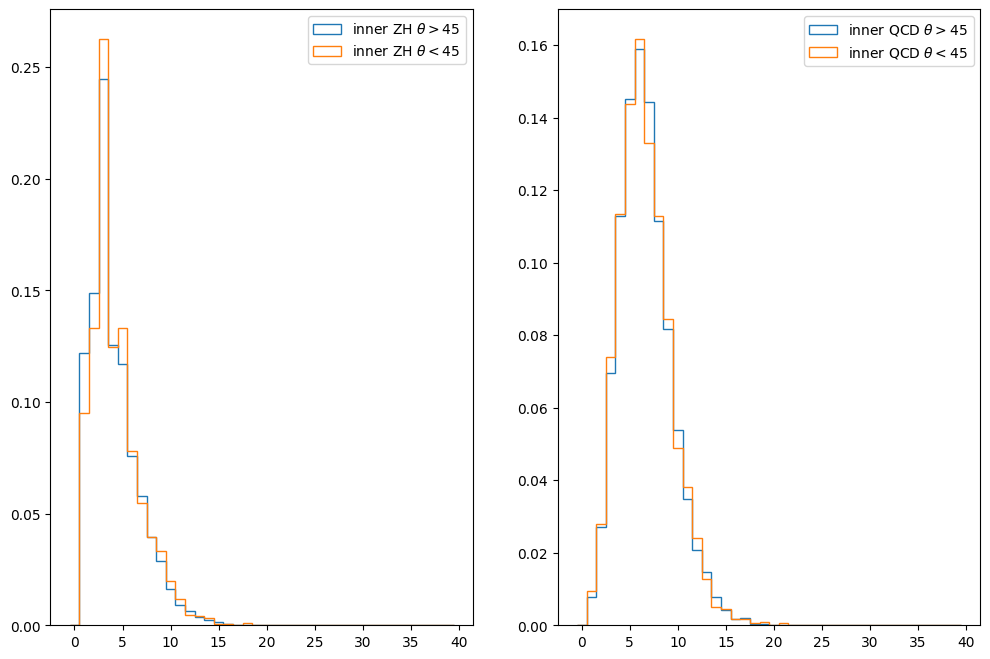

In [14]:
mul_br_zh = np.sum(np.sum(inner[mask_br,11:16,:,:], axis=(2,3))+np.sum(inner[mask_br,27:32,:,:], axis=(2,3)),axis=1)
mul_en_zh = np.sum(np.sum(inner[mask_en,11:16,:,:], axis=(2,3))+np.sum(inner[mask_en,27:32,:,:], axis=(2,3)),axis=1)
mul_br_qcd = np.sum(np.sum(inner_qcd[mask_br_qcd,11:16,:,:], axis=(2,3))+np.sum(inner_qcd[mask_br_qcd,27:32,:,:], axis=(2,3)),axis=1)
mul_en_qcd = np.sum(np.sum(inner_qcd[mask_en_qcd,11:16,:,:], axis=(2,3))+np.sum(inner_qcd[mask_en_qcd,27:32,:,:], axis=(2,3)),axis=1)

fig, axs0 = plt.subplots(1,2, figsize=(3*4,2*4))

plt.sca(axs0[0])
a,b,c=plt.hist(mul_br_zh,bins=40, range=(-0.5,39.5), histtype='step',label=r'inner ZH $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_zh,bins=40, range=(-0.5,39.5), histtype='step', label=r'inner ZH $\theta<45$', density=True)
plt.legend()

plt.sca(axs0[1])
a,b,c=plt.hist(mul_br_qcd,bins=40, range=(-0.5, 39.5), histtype='step', label=r'inner QCD $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_qcd,bins=40, range=(-0.5,39.5), histtype='step', label=r'inner QCD $\theta<45$', density=True)
plt.legend()

assert(ak.all(mul_br_zh)!=0)
assert(ak.all(mul_en_zh)!=0)
assert(ak.all(mul_br_qcd)!=0)
assert(ak.all(mul_en_qcd)!=0)

In [8]:
print(f'particle multiplicity zero for {ak.sum((mul_br_zh==0))} entries for ZH in barrel and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_en_zh==0))} entries for ZH in endcap and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_br_qcd==0))} entries for QCD in barrel and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_en_zh==0))} entries for QCD in barrel and inner grid')
#print(' for zero multiplicities there is no electron, muon, charged hadron, neutral hadron and gamma. Only one particle (what is the pdgid?)')

particle multiplicity zero for 0 entries for ZH in barrel and inner grid
particle multiplicity zero for 0 entries for ZH in endcap and inner grid
particle multiplicity zero for 0 entries for QCD in barrel and inner grid
particle multiplicity zero for 0 entries for QCD in barrel and inner grid


In [9]:
outer = data['outer_grid'].to_numpy()
outer_qcd = data_qcd['outer_grid'].to_numpy()

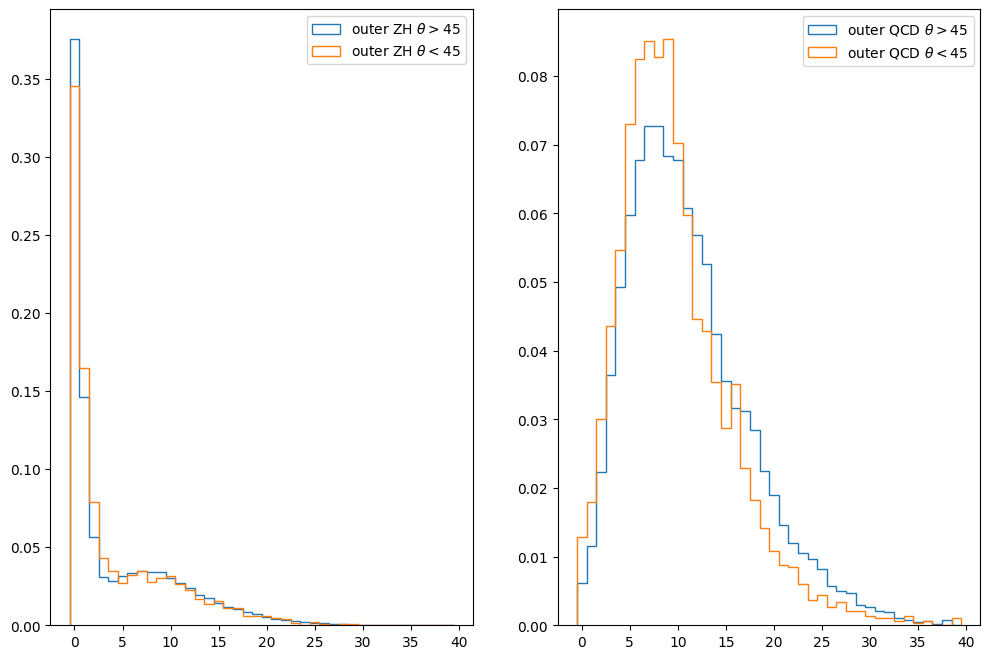

In [56]:
mul_br_zh = np.sum(np.sum(outer[mask_br,11:16,:,:], axis=(2,3))+np.sum(outer[mask_br,27:32,:,:], axis=(2,3)),axis=1)
mul_en_zh = np.sum(np.sum(outer[mask_en,11:16,:,:], axis=(2,3))+np.sum(outer[mask_en,27:32,:,:], axis=(2,3)),axis=1)
mul_br_qcd = np.sum(np.sum(outer_qcd[mask_br_qcd,11:16,:,:], axis=(2,3))+np.sum(outer_qcd[mask_br_qcd,27:32,:,:], axis=(2,3)),axis=1)
mul_en_qcd = np.sum(np.sum(outer_qcd[mask_en_qcd,11:16,:,:], axis=(2,3))+np.sum(outer_qcd[mask_en_qcd,27:32,:,:], axis=(2,3)),axis=1)

fig, axs0 = plt.subplots(1,2, figsize=(3*4,2*4))

plt.sca(axs0[0])
a,b,c=plt.hist(mul_br_zh,bins=40, range=(-0.5,39.5), histtype='step',label=r'outer ZH $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_zh,bins=40, range=(-0.5,39.5), histtype='step', label=r'outer ZH $\theta<45$', density=True)
plt.legend()

plt.sca(axs0[1])
a,b,c=plt.hist(mul_br_qcd,bins=40, range=(-0.5,39.5), histtype='step', label=r'outer QCD $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_qcd,bins=40, range=(-0.5,39.5), histtype='step', label=r'outer QCD $\theta<45$', density=True)
plt.legend()
#print((np.sum(np.sum(inner[:,11:16,:,:], axis=(2,3)) + np.sum(inner[:,27:32,:,:], axis=(2,3)),axis=1)))

In [57]:
print(f'particle multiplicity zero for {ak.sum((mul_br_zh==0))} entries for ZH in barrel and outer grid')
print(f'particle multiplicity zero for {ak.sum((mul_en_zh==0))} entries for ZH in endcap and outer grid')
print(f'particle multiplicity zero for {ak.sum((mul_br_qcd==0))} entries for QCD in barrel and outer grid')
print(f'particle multiplicity zero for {ak.sum((mul_en_zh==0))} entries for QCD in barrel and outer grid')

particle multiplicity zero for 10059 entries for ZH in barrel and outer grid
particle multiplicity zero for 917 entries for ZH in endcap and outer grid
particle multiplicity zero for 58 entries for QCD in barrel and outer grid
particle multiplicity zero for 917 entries for QCD in barrel and outer grid


In [63]:
print(f'unique pdgid in data {np.unique(ak.flatten(data.event_reco_cand_pdg))}')


unique pdgid in data [-13, -11, 11, 13, 22, 130, 211]


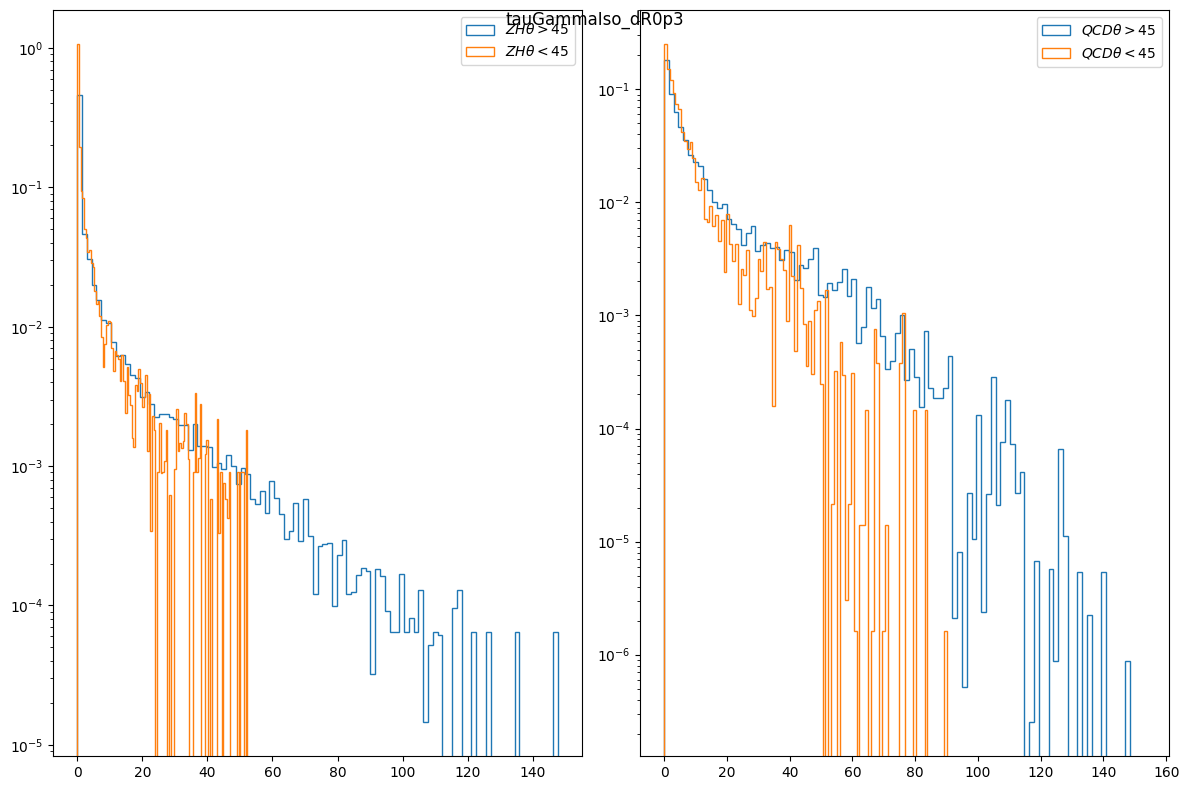

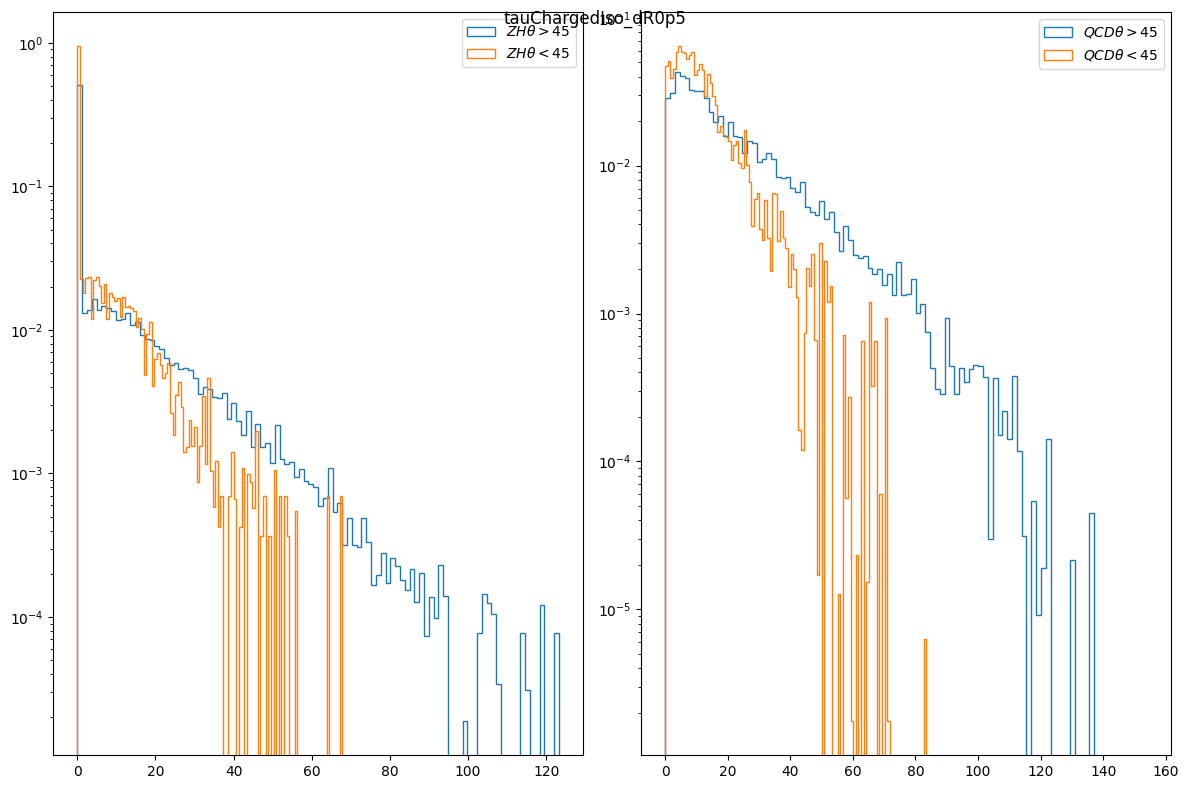

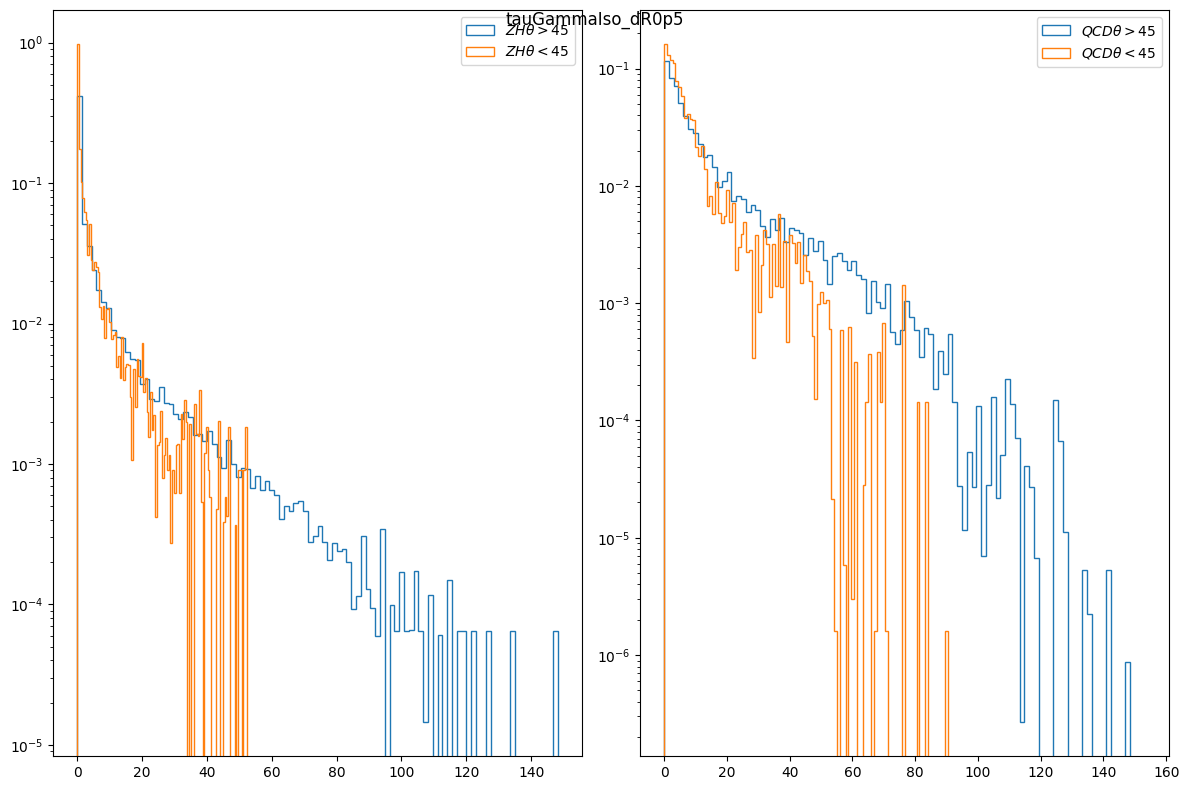

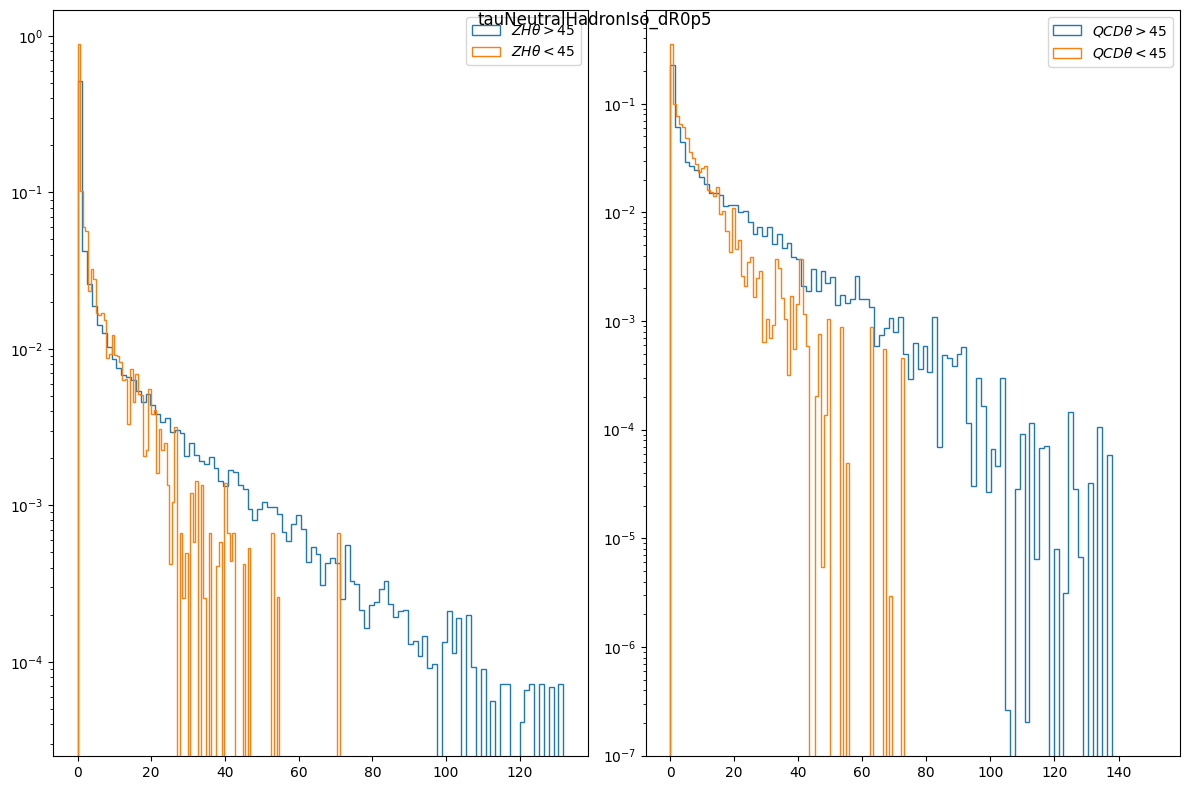

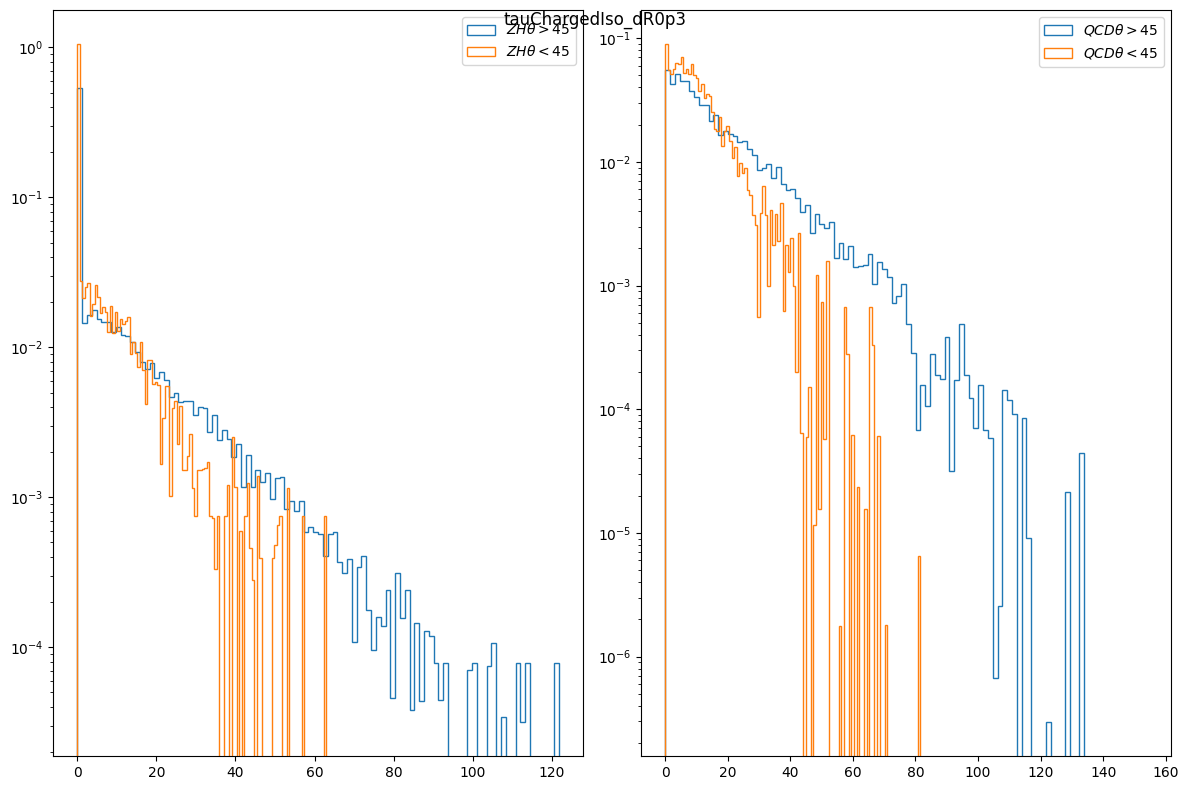

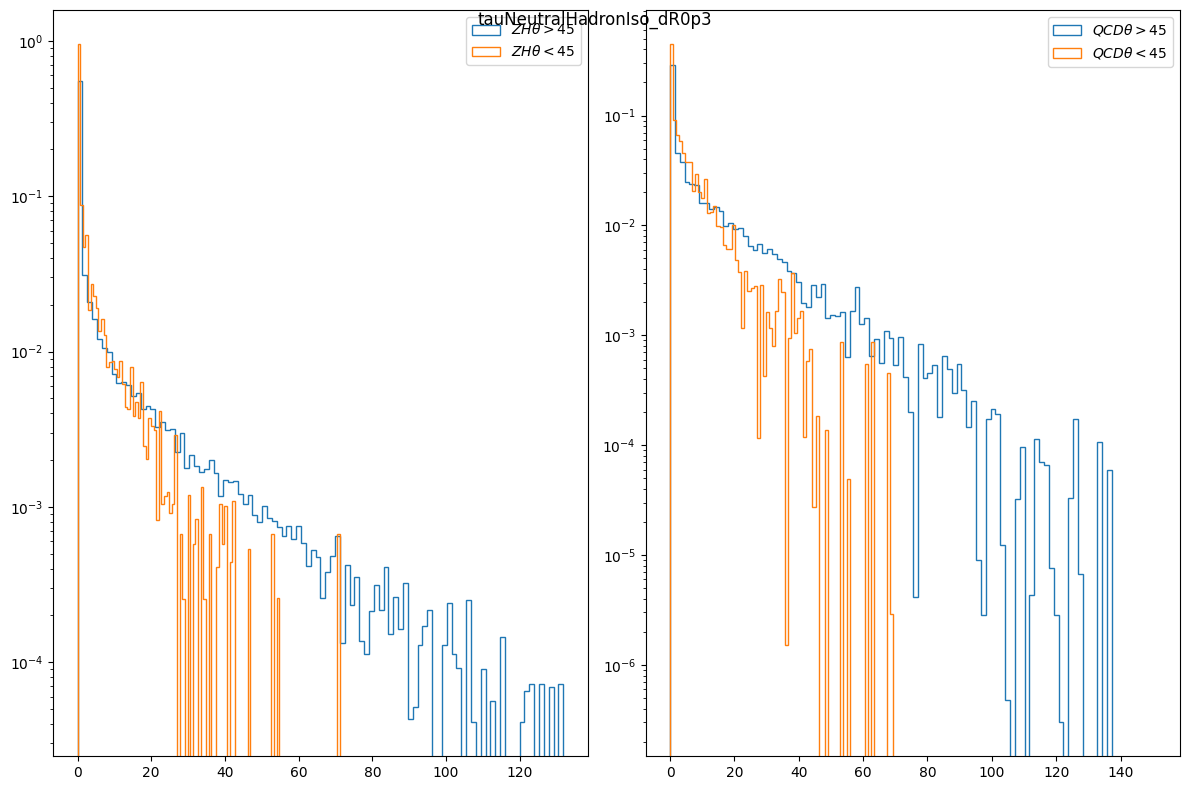

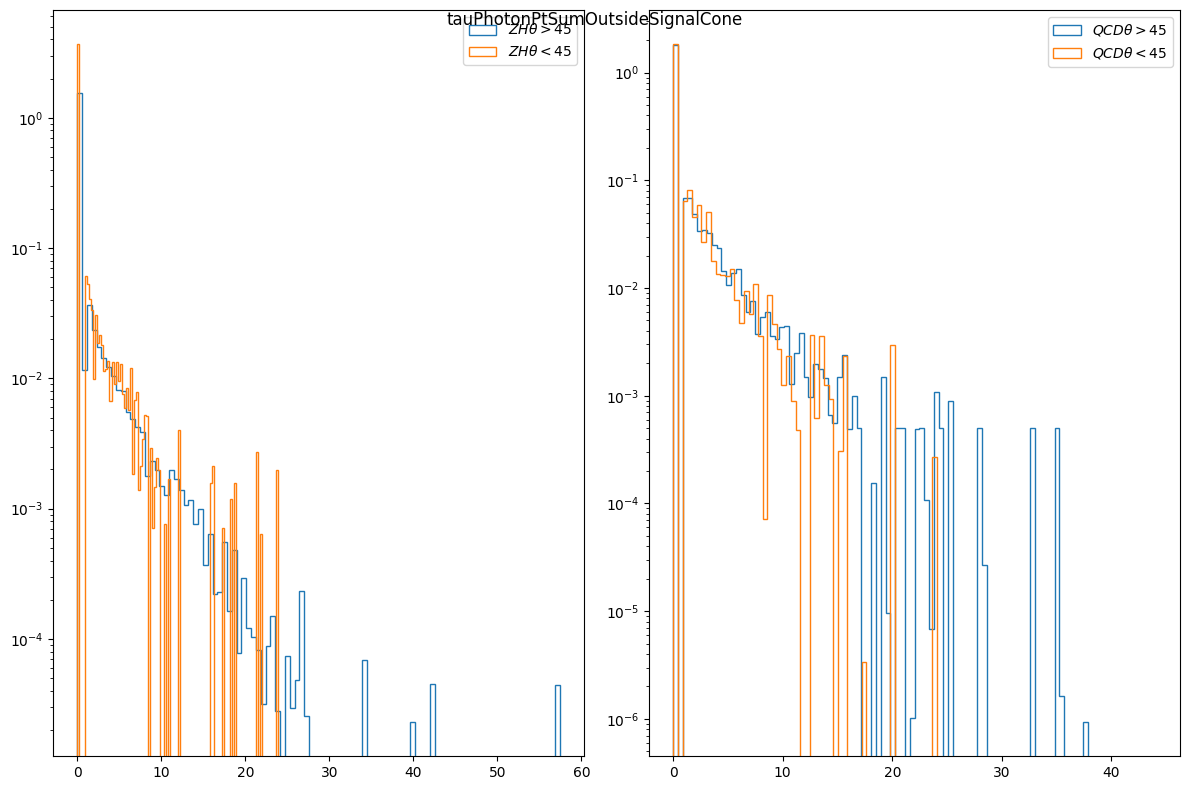

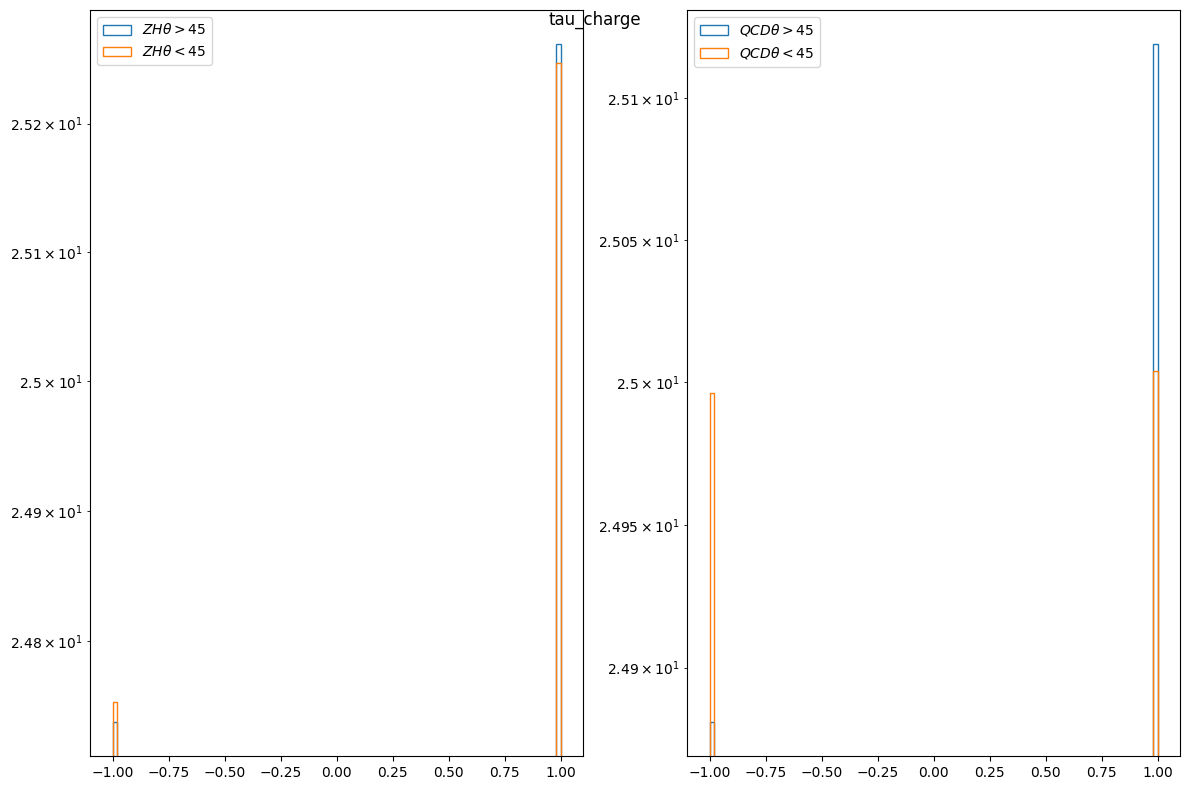

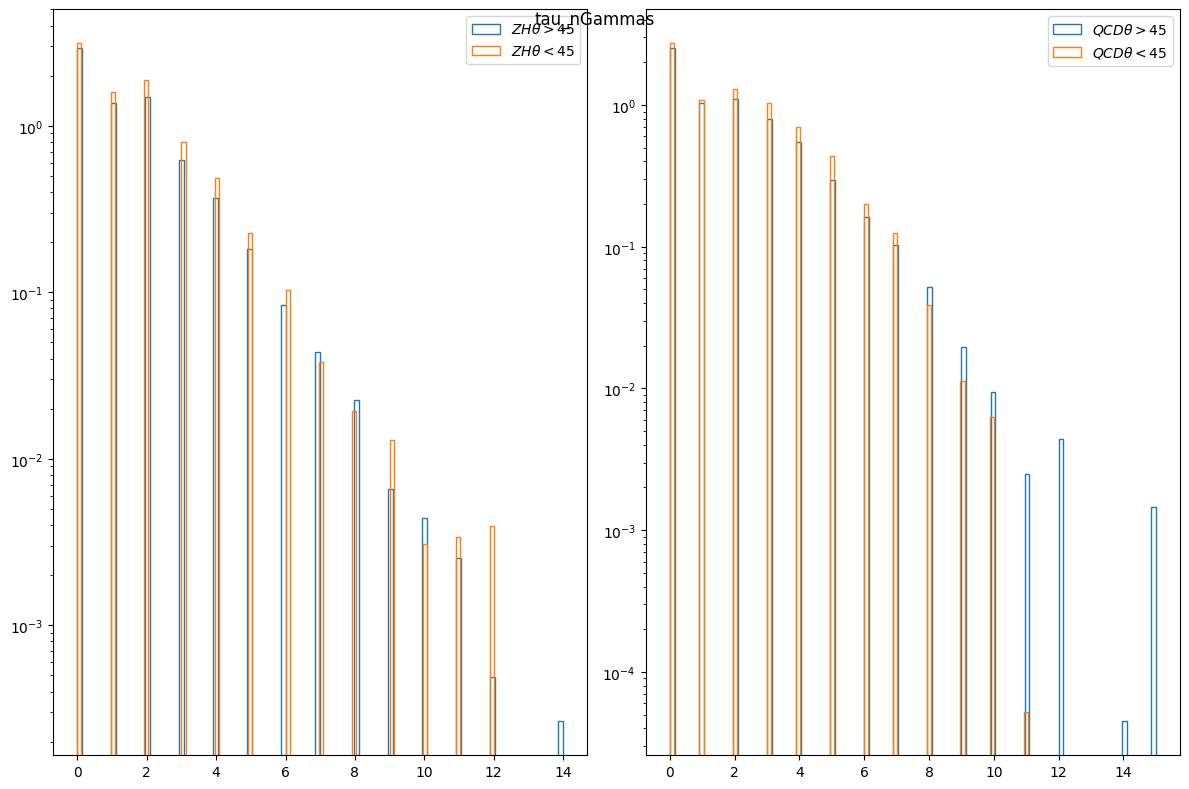

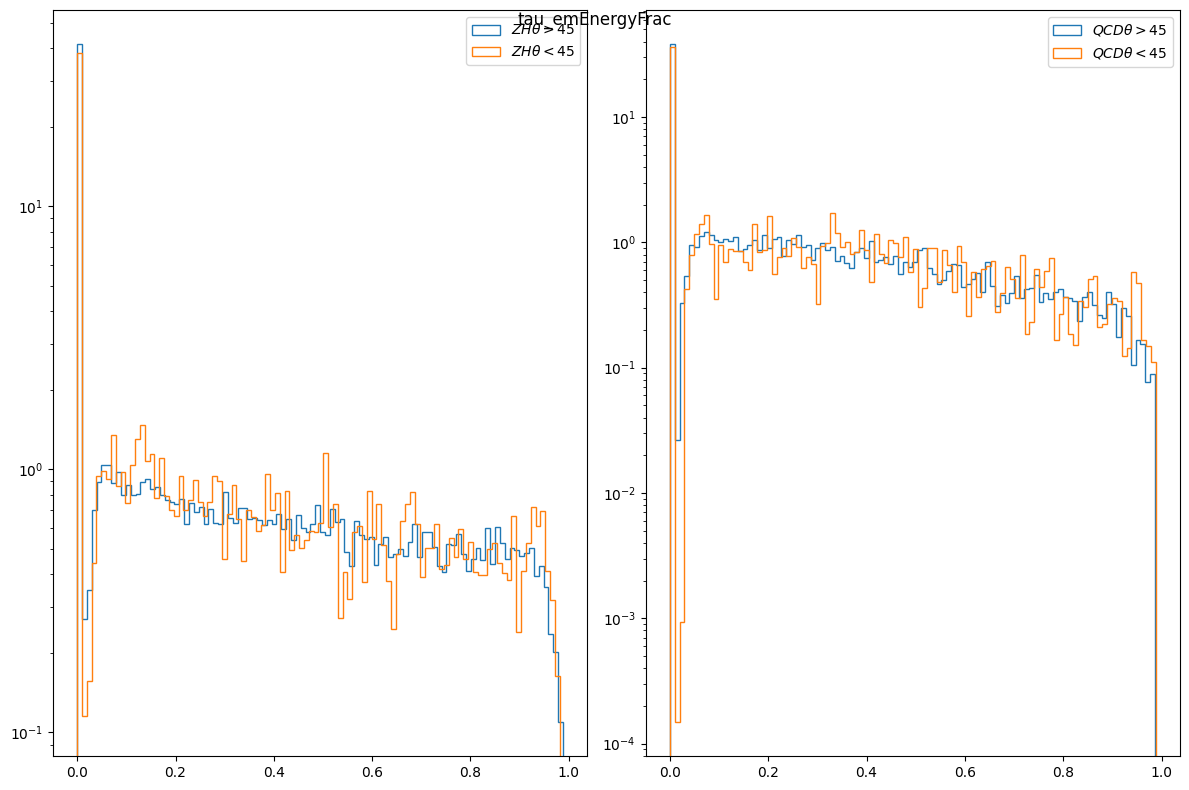

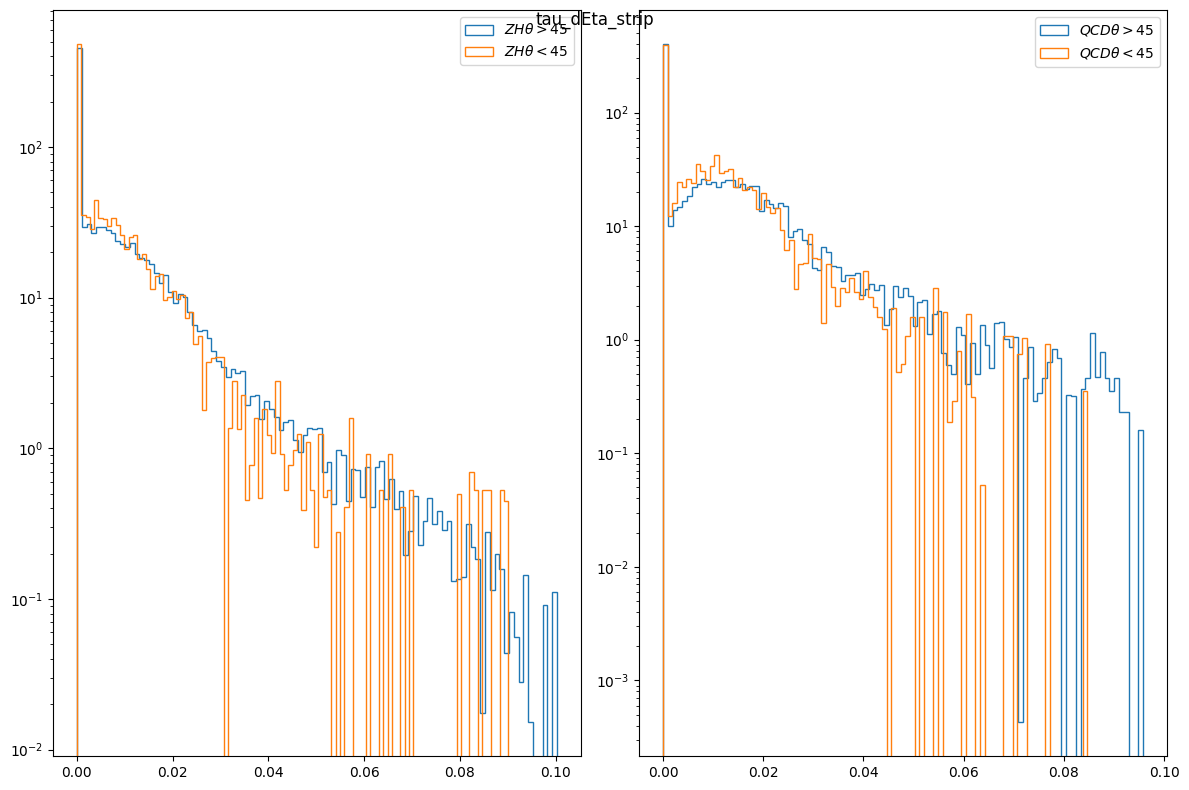

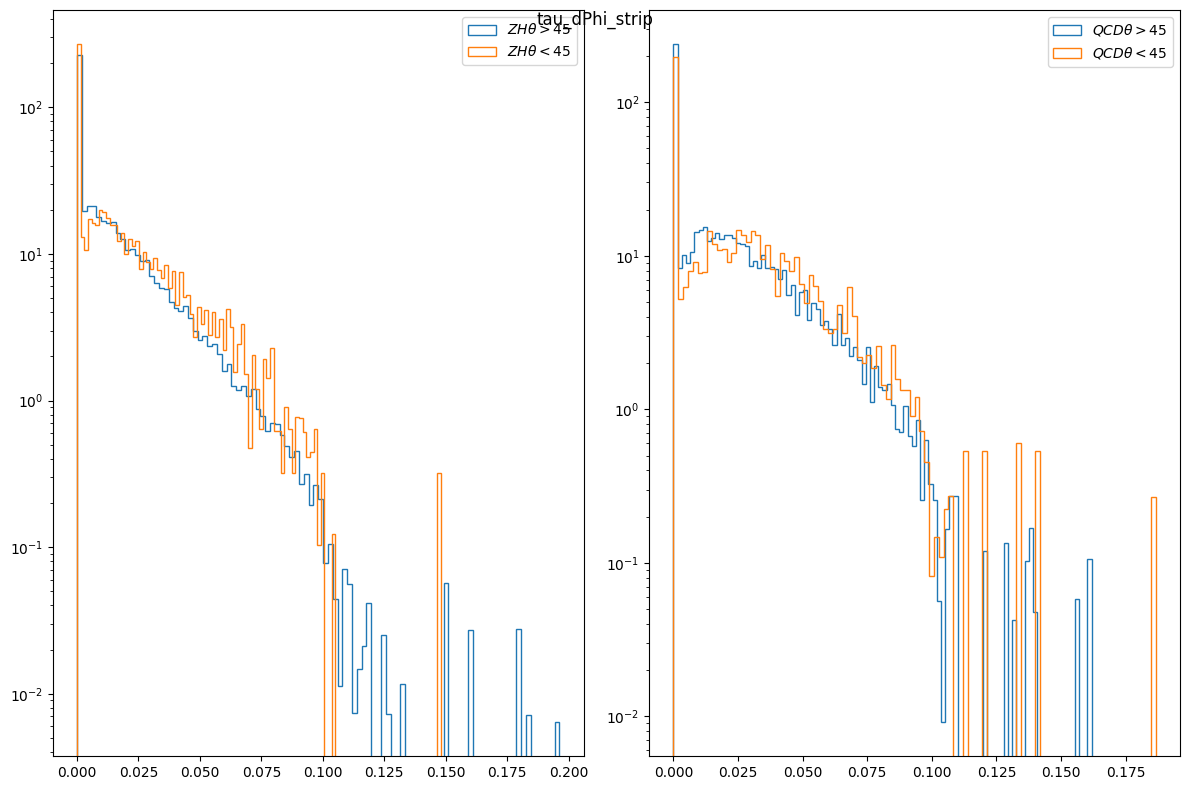

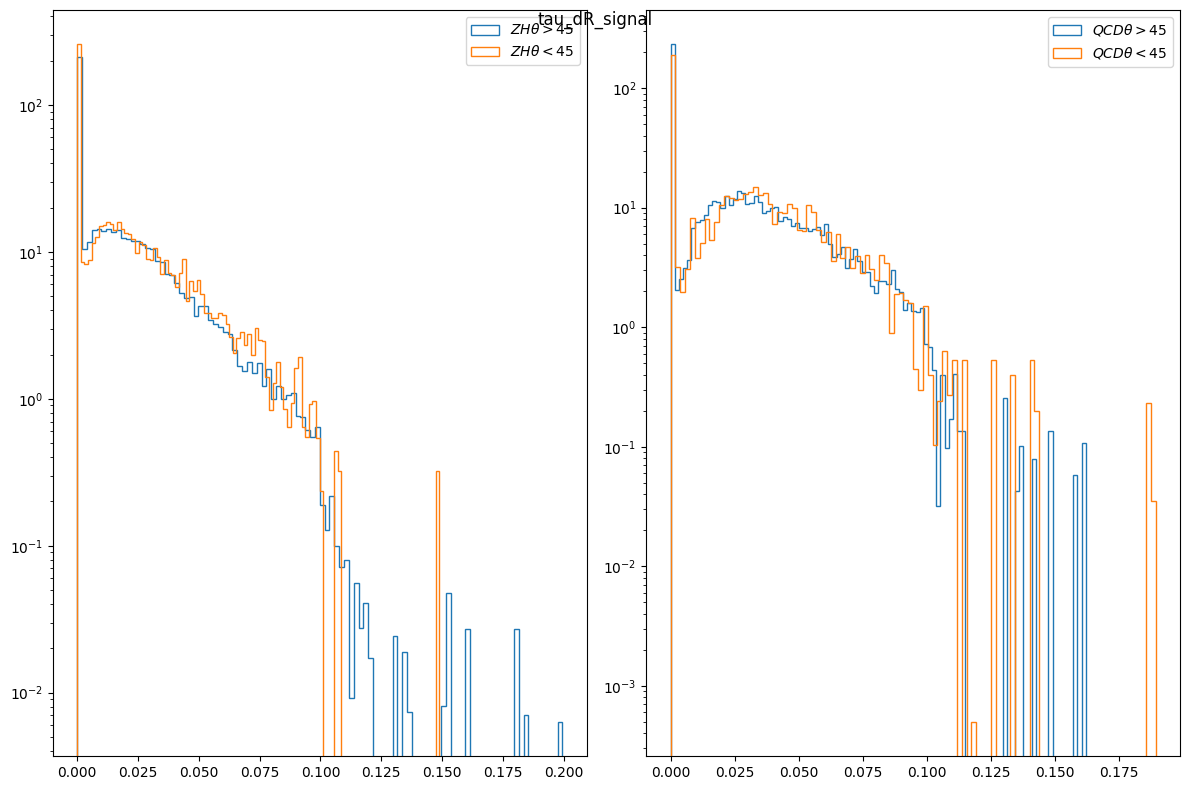

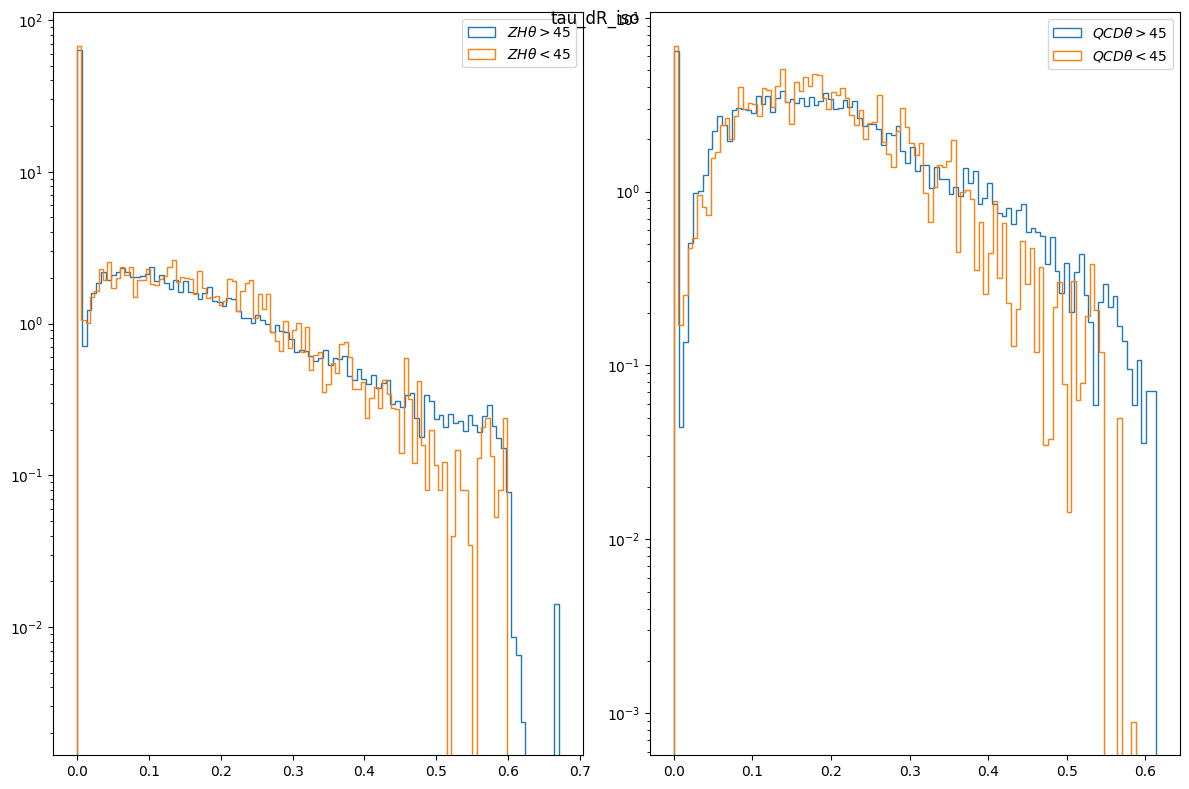

In [41]:
for var in ['tauGammaIso_dR0p3', 'tauChargedIso_dR0p5', 'tauGammaIso_dR0p5', 'tauNeutralHadronIso_dR0p5', 'tauChargedIso_dR0p3', 'tauNeutralHadronIso_dR0p3', 'tauPhoton\
PtSumOutsideSignalCone', 'tau_charge', 'tau_nGammas', 'tau_emEnergyFrac', 'tau_dEta_strip', 'tau_dPhi_strip', 'tau_dR_signal', 'tau_dR_iso']:
        fig, axs0 = plt.subplots(1,2, figsize=(3*4,2*4))
        plt.sca(axs0[0])
        a,b,c = plt.hist(data[mask_br][var], bins=100, histtype='step', density=True, log=True, weights=data.weight[mask_br], label=r'$ZH \theta > 45$')
        a,b,c = plt.hist(data[mask_en][var], bins=100, histtype='step', density=True, log=True, weights=data.weight[mask_en], label=r'$ZH \theta < 45$')
        plt.legend()

        plt.sca(axs0[1])
        a,b,c = plt.hist(data_qcd[mask_br_qcd][var], bins=100, histtype='step', density=True, log=True, weights=data_qcd.weight[mask_br_qcd], label=r'$QCD \theta > 45$')
        a,b,c = plt.hist(data_qcd[mask_en_qcd][var], bins=100, histtype='step', density=True, log=True, weights=data_qcd.weight[mask_en_qcd], label=r'$QCD \theta < 45$')
        plt.legend()
                                       
        plt.tight_layout()
        plt.suptitle(f"{var}")